In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D, ZeroPadding3D

from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils

import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from keras.preprocessing import image
from natsort import natsorted
from tqdm import tqdm
#from PIL import Image

Using TensorFlow backend.


In [2]:
path_0 = r'D:\2020Spring\636_project\final_video\label_0/'
path_1 = r'D:\2020Spring\636_project\final_video\label_1/'
#print(files)
train_0 = []
train_1 = []
train = []

In [3]:
files= os.listdir(path_0)
files = natsorted(files)
#print(files)
for i in tqdm(range(len(files))):
        img = image.load_img(r'D:\2020Spring\636_project\final_video\label_0/'+files[i])
        img = np.float32(img)
        img = cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)
        img = image.img_to_array(img)
        train_0.append(img)

100%|██████████| 700/700 [00:14<00:00, 47.41it/s] 


In [4]:
files= os.listdir(path_1)
files = natsorted(files)
#print(files)
for i in tqdm(range(len(files))):
        img = image.load_img(r'D:\2020Spring\636_project\final_video\label_1/'+files[i])
        img = np.float32(img)
        img = cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)
        img = image.img_to_array(img)
        train_1.append(img)

100%|██████████| 700/700 [00:26<00:00, 25.95it/s]


In [5]:
train.append(train_0)
train.append(train_1)
train = np.array(train)

In [6]:
print(train.shape)

(2, 700, 224, 224, 3)


In [7]:
train = np.reshape(train,(1400,224,224,3))

In [8]:
train = np.reshape(train,(100,14,224,224,3))
train.shape

(100, 14, 224, 224, 3)

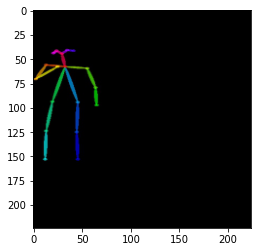

In [9]:
temp = train[53][9]
temp = image.array_to_img(temp)
plt.imshow(temp)

In [10]:
num_samples = len(train)
label=np.ones((num_samples,),dtype = int)
label[0:50]= 0
label[50:100] = 1

train_data = [train,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

Y_train = np_utils.to_categorical(y_train, 2)

X_Train shape: (100, 14, 224, 224, 3)


In [11]:
# Pre-processing
X_train = X_train.astype('float32')
X_train -= np.mean(X_train)
X_train /=np.max(X_train)

In [12]:
# Split the data
X_train_new, X_val_new, y_train_new,y_val_new =  train_test_split(X_train, Y_train, test_size=0.2, random_state=23)

In [13]:
# Design Model
model = Sequential()

model.add(Convolution3D(64, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv1',
                        subsample=(1, 1, 1), dim_ordering='tf', 
                        input_shape=(14, 224, 224, 3)))

model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), 
                        border_mode='valid', name='pool1'))

model.add(Convolution3D(128, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv2', 
                        subsample=(1, 1, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                        border_mode='valid', name='pool2'))

model.add(Convolution3D(256, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv3a',
                        subsample=(1, 1, 1)))
'''
model.add(Convolution3D(256, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv3b',
                        subsample=(1, 1, 1)))
'''
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                        border_mode='valid', name='pool3'))
'''
model.add(Convolution3D(256, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv4a', 
                        subsample=(1, 1, 1)))
model.add(Convolution3D(256, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv4b',
                        subsample=(1, 1, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                        border_mode='valid', name='pool4'))

model.add(Convolution3D(256, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv5a',
                        subsample=(1, 1, 1)))
model.add(Convolution3D(256, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv5b',
                        subsample=(1, 1, 1)))
model.add(ZeroPadding3D(padding=(0, 1, 1)))
model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), 
                        border_mode='valid', name='pool5'))
'''
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, init='normal', activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(2,init='normal'))

model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

D:\Software\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(64, (3, 3, 3), activation="relu", name="conv1", input_shape=(14, 224, ..., strides=(1, 1, 1), padding="same", data_format="channels_last")`
  import sys
D:\Software\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), name="pool1", padding="valid")`
  # Remove the CWD from sys.path while we load stuff.
D:\Software\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(128, (3, 3, 3), activation="relu", name="conv2", strides=(1, 1, 1), padding="same")`
  
D:\Software\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), na

In [14]:
hist = model.fit(X_train_new, y_train_new, validation_data=(X_val_new,y_val_new),
          batch_size = 8, epochs = 8, shuffle=True)

Train on 80 samples, validate on 20 samples
Epoch 1/8
80/80 [==============================] - ETA: 12:39 - loss: 0.7575 - accuracy: 0.500 - ETA: 11:00 - loss: 1.2580 - accuracy: 0.625 - ETA: 9:27 - loss: 76.9581 - accuracy: 0.583 - ETA: 8:03 - loss: 58.7301 - accuracy: 0.500 - ETA: 6:41 - loss: 47.2898 - accuracy: 0.525 - ETA: 5:19 - loss: 39.5902 - accuracy: 0.500 - ETA: 3:59 - loss: 34.0993 - accuracy: 0.482 - ETA: 2:39 - loss: 29.9344 - accuracy: 0.453 - ETA: 1:19 - loss: 26.6841 - accuracy: 0.458 - 810s 10s/step - loss: 24.0911 - accuracy: 0.4500 - val_loss: 0.6347 - val_accuracy: 0.8500
Epoch 2/8
80/80 [==============================] - ETA: 11:50 - loss: 0.6391 - accuracy: 0.500 - ETA: 10:33 - loss: 0.6105 - accuracy: 0.562 - ETA: 9:14 - loss: 0.6199 - accuracy: 0.541 - ETA: 7:54 - loss: 0.5871 - accuracy: 0.59 - ETA: 6:36 - loss: 0.5309 - accuracy: 0.67 - ETA: 5:16 - loss: 0.5900 - accuracy: 0.66 - ETA: 3:57 - loss: 0.6260 - accuracy: 0.62 - ETA: 2:38 - loss: 0.6183 - accuracy:

In [15]:
score = model.evaluate(X_val_new,y_val_new, batch_size=16)

20/20 [==============================] - ETA:  - 15s 764ms/step


In [17]:
model.save('my_model_P8_2335.h5')